# Marketing Campaigns


## Problem Scenario:

‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.


## Problem Objective:

As a data scientist, you should perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.


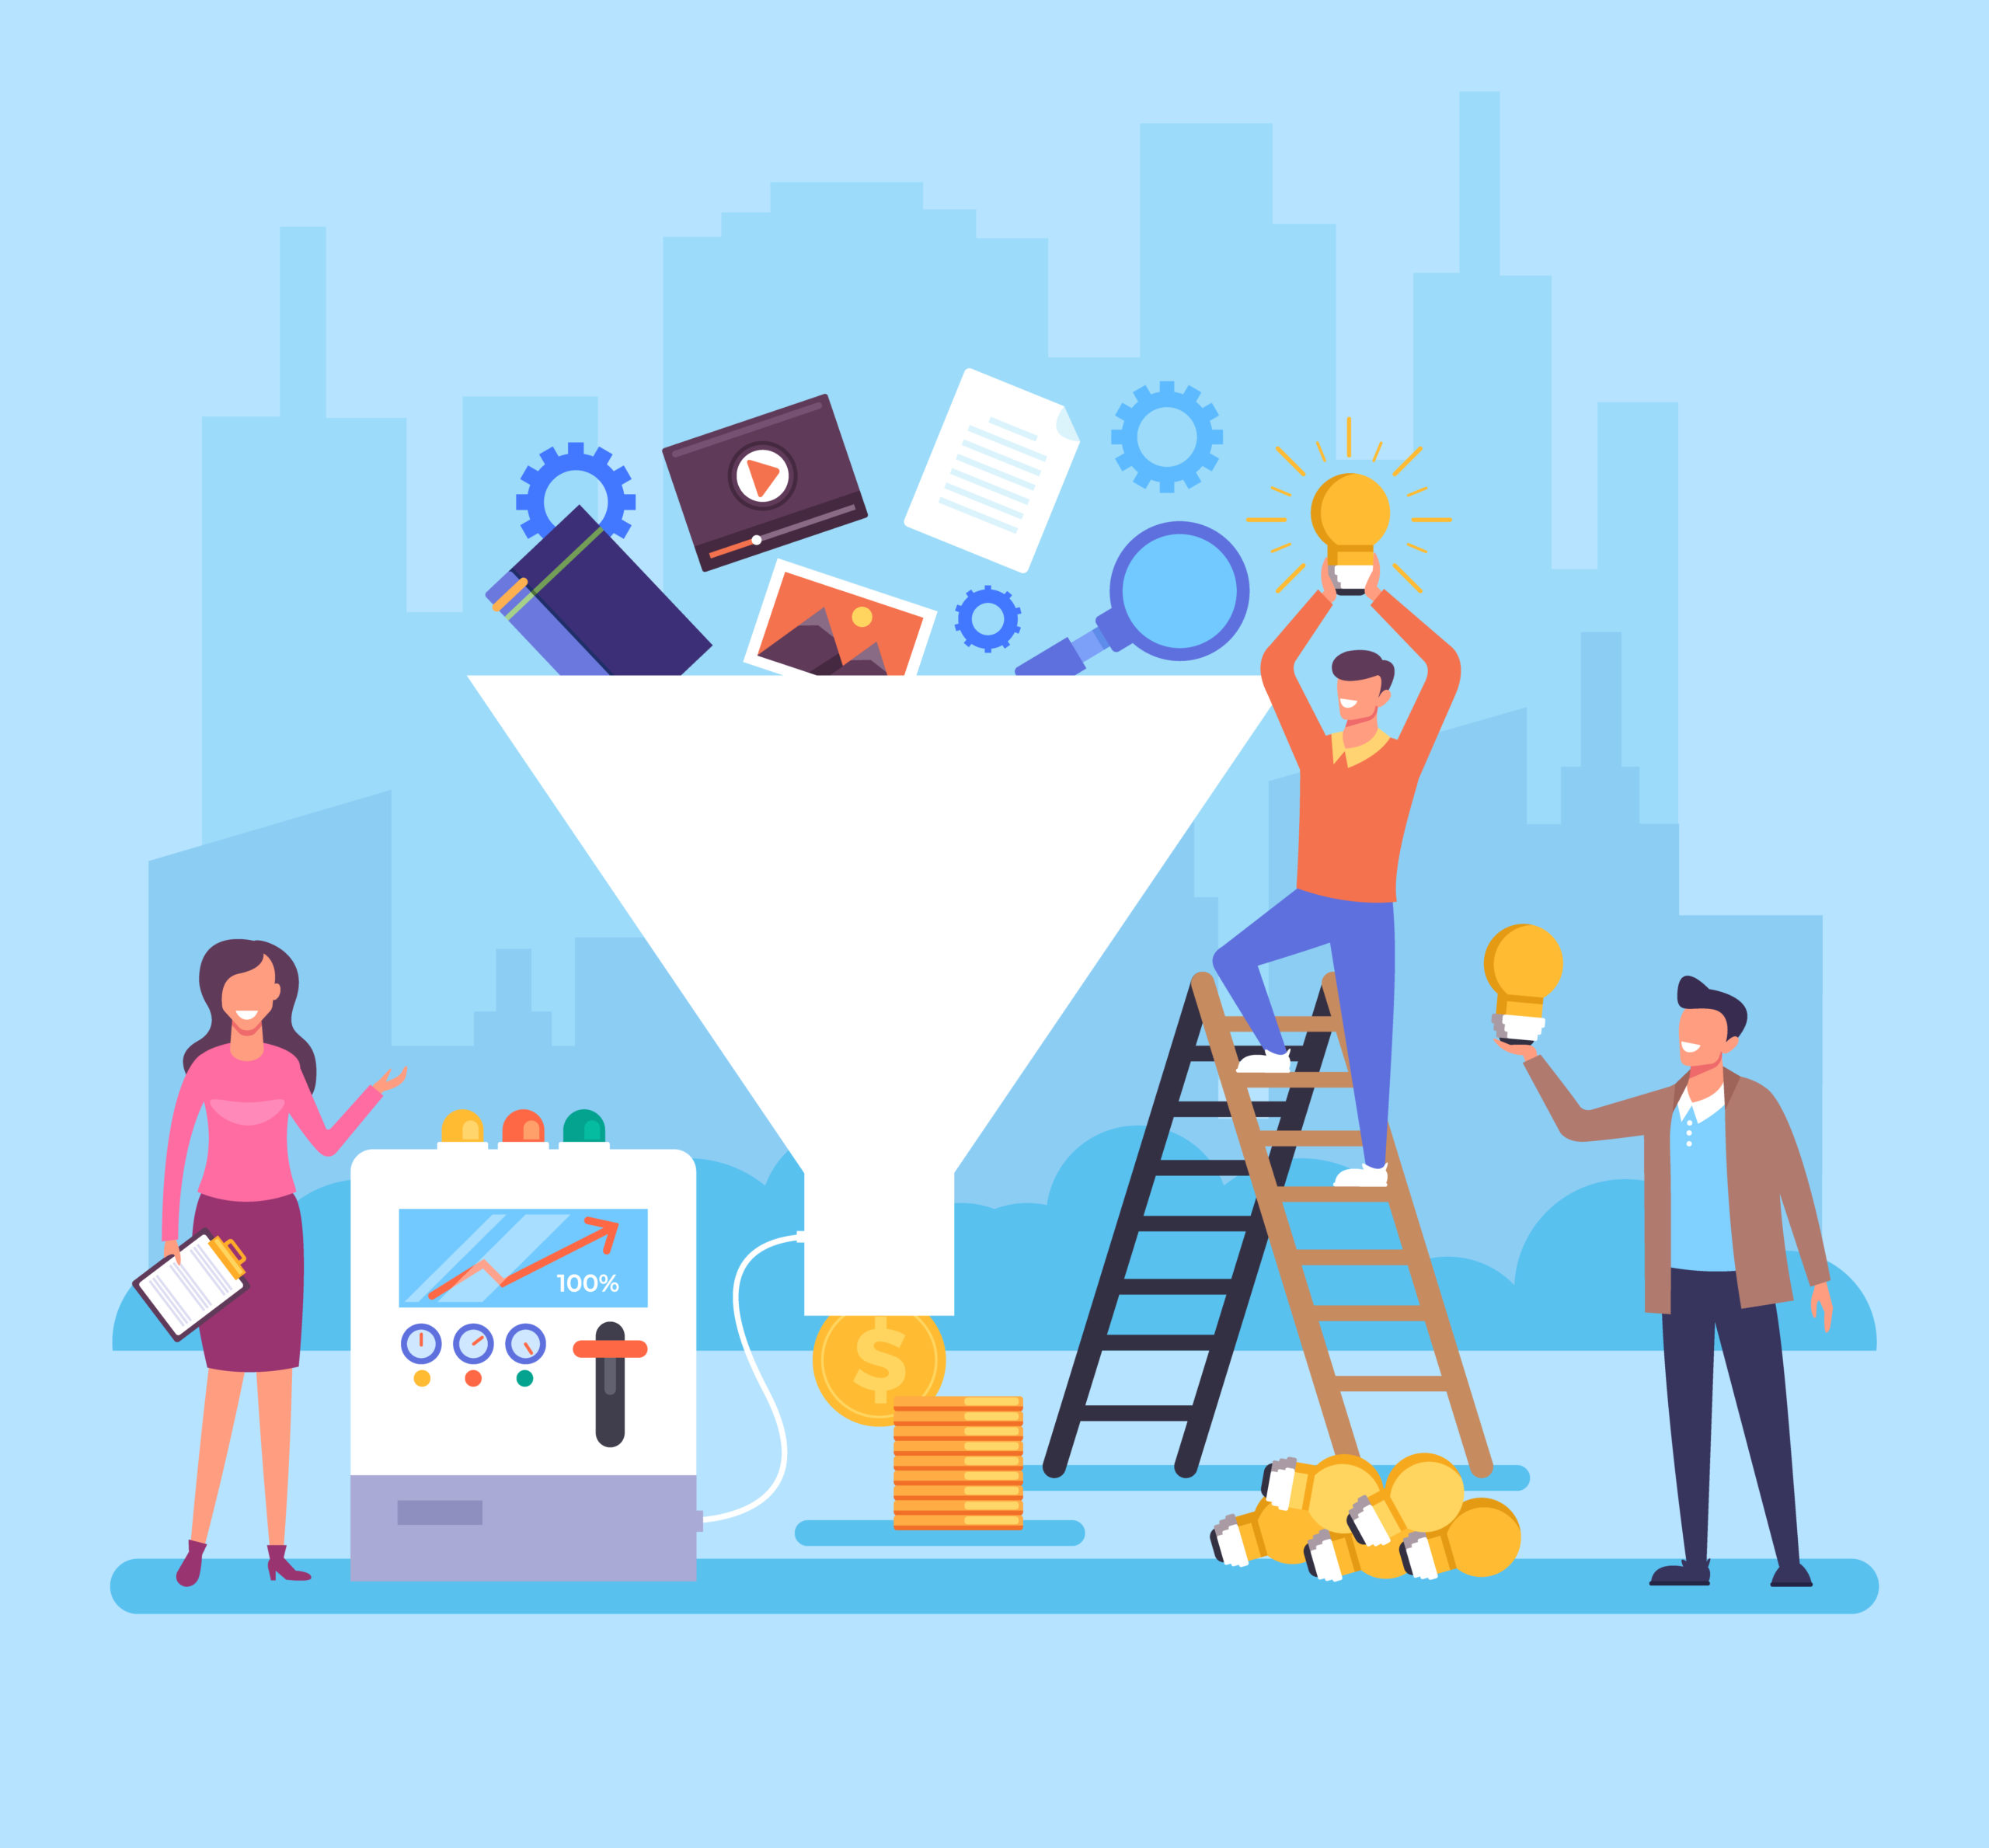


## Step 0: Import libraries

- Install pycountry package to check the countries in th Country column

In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pycountry
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Step 1: Import Data

- Read dataset

In [3]:
df = pd.read_csv('marketing_data.csv',parse_dates = True)

- Check memory usage per column.

In [4]:
df.memory_usage(deep=True)

Index                     128
ID                      17920
Year_Birth              17920
Education              144522
Marital_Status         143524
 Income                151440
Kidhome                 17920
Teenhome                17920
Dt_Customer            143283
Recency                 17920
MntWines                17920
MntFruits               17920
MntMeatProducts         17920
MntFishProducts         17920
MntSweetProducts        17920
MntGoldProds            17920
NumDealsPurchases       17920
NumWebPurchases         17920
NumCatalogPurchases     17920
NumStorePurchases       17920
NumWebVisitsMonth       17920
AcceptedCmp3            17920
AcceptedCmp4            17920
AcceptedCmp5            17920
AcceptedCmp1            17920
AcceptedCmp2            17920
Response                17920
Complain                17920
Country                132588
dtype: int64

- Check data general info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- Check stats of each column in df

In [6]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

## Step 2: Data Cleaning + Preprocessing

### Data in general:

#### 1. Duplicated records

In [7]:
df['ID'].is_unique

True

#### 2. Invalid entries

In [8]:
country = df["Country"].unique()
response_rate = df.groupby("Country").sum()["Response"].sort_values(ascending=False)


df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

df['Education'] = df['Education'].replace('Graduation', 'Bachelor')


# Check countries initials
def is_valid_country_initials(initials):
    try:
        pycountry.countries.get(alpha_2=initials)
        return True
    except pycountry.exceptions.CountryNotFoundError:
        return False

all(is_valid_country_initials(initial) for initial in df['Country'])

True

#### 3. Rename Cols & formatting
    - Remove white spaces from the Income column

In [9]:
df.rename(columns={' Income ':'Income'},inplace=True)

df['Year_Birth'] = df['Year_Birth'].astype('int32')

df['Education'] = df['Education'].astype('string')
df['Marital_Status'] = df['Marital_Status'].astype('string')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Country'] = df['Country'].astype('string')

df['Kidhome'] = df['Kidhome'].astype('int8')
df['Teenhome'] = df['Teenhome'].astype('int8')


df['Income'] = df['Income'].str.replace('[$,]', '', regex=True).astype(float)

#### 4. Data Type check

In [10]:
df.dtypes

ID                              int64
Year_Birth                      int32
Education                      string
Marital_Status                 string
Income                        float64
Kidhome                          int8
Teenhome                         int8
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

### Numeric

#### 1. Missing entries
- Check missing entries

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

- Fill missing entries in the 'Income' column with the average income of people with similar education level.

In [12]:
df['Income'] = df.groupby(['Education','Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

#### 2. Local values 

In [13]:
selected_cols = df.iloc[:, list(range(0, 6)) + list(range(7, 26))]

mins = selected_cols.apply(lambda col: col.min())
maxs = selected_cols.apply(lambda col: col.max())

for col,min_val, max_val in zip(selected_cols, mins, maxs):
    print(col, ': min =', min_val, ', max =', max_val)

ID : min = 0 , max = 11191
Year_Birth : min = 1893 , max = 1996
Education : min = 2n Cycle , max = PhD
Marital_Status : min = Divorced , max = Widow
Income : min = 1730.0 , max = 666666.0
Kidhome : min = 0 , max = 2
Dt_Customer : min = 2012-07-30 00:00:00 , max = 2014-06-29 00:00:00
Recency : min = 0 , max = 99
MntWines : min = 0 , max = 1493
MntFruits : min = 0 , max = 199
MntMeatProducts : min = 0 , max = 1725
MntFishProducts : min = 0 , max = 259
MntSweetProducts : min = 0 , max = 263
MntGoldProds : min = 0 , max = 362
NumDealsPurchases : min = 0 , max = 15
NumWebPurchases : min = 0 , max = 27
NumCatalogPurchases : min = 0 , max = 28
NumStorePurchases : min = 0 , max = 13
NumWebVisitsMonth : min = 0 , max = 20
AcceptedCmp3 : min = 0 , max = 1
AcceptedCmp4 : min = 0 , max = 1
AcceptedCmp5 : min = 0 , max = 1
AcceptedCmp1 : min = 0 , max = 1
AcceptedCmp2 : min = 0 , max = 1
Response : min = 0 , max = 1


#### 3. Identifying and Dealing with outliers
  - We checked for outliers in 'Income' and 'Year_Birth'
  - An outlier is identified if its value in not between the Lower and Upper Bound.
    - Lower Bound: (Q1 - 1.5 * IQR) 
    - Upper Bound: (Q3 + 1.5 * IQR)
  - We dropped all outliers.

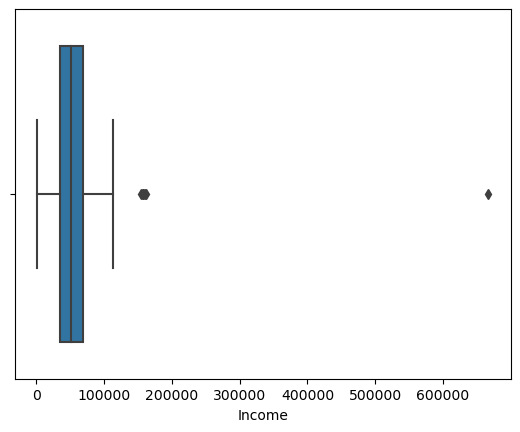

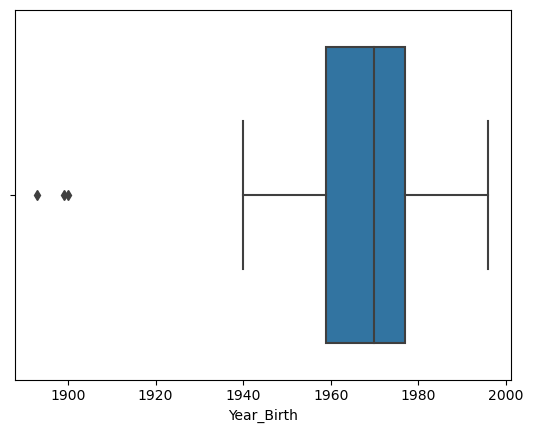

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2229.000000  2229.000000    2229.000000  2229.000000  2229.000000   
mean    5589.296097  1968.888739   51630.201065     0.444594     0.507402   
std     3244.840538    11.707430   20603.994617     0.538636     0.544735   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   35416.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51365.633065     0.000000     0.000000   
75%     8420.000000  1977.000000   68118.000000     1.000000     1.000000   
max    11191.000000  1996.000000  113734.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2229.000000  2229.000000  2229.000000      2229.000000   
mean     49.106326   304.991476    26.348587       165.283984   
std      28.946476   336.761943    39.764060       219.336589   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   176.000000     8.000000        67.000000   
75%      74.000000   505.000000    33.000000       231.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count      2229.000000  ...          2229.000000        2229.000000   
mean         37.642441  ...             2.636608           5.812472   
std          54.700548  ...             2.796161           3.242144   
min           0.000000  ...             0.000000           0.000000   
25%           3.000000  ...             0.000000           3.000000   
50%          12.000000  ...             2.000000           5.000000   
75%          50.000000  ...             4.000000           8.000000   
max         259.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2229.000000   2229.000000   2229.000000   2229.000000   
mean            5.334231      0.073127      0.074921      0.072678   
std             2.414981      0.260403      0.263324      0.259666   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2229.000000   2229.000000  2229.000000  2229.000000  
mean       0.064603      0.013459     0.149843     0.008973  
std        0.245879      0.115255     0.356998     0.094319  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [14]:
sns.boxplot(df["Income"])
plt.show()

sns.boxplot(df['Year_Birth'])
plt.show()

df['Income'].describe()
_25, _75 = np.percentile(df["Income"],[25,75])
irq = _75 - _25
income_upper = _75 + 1.5*irq
income_lower = _25 - 1.5*irq


df['Year_Birth'].describe()
_25, _75 = np.percentile(df["Year_Birth"],[25,75])
irq = _75 - _25
birth_upper = ( _75 + 1.5*irq)
birth_lower = ( _25 - 1.5*irq)


df.drop(df[(df['Year_Birth'] > birth_upper ) | (df['Year_Birth'] < birth_lower)].index, inplace=True)
df.drop(df[(df['Income'] > income_upper ) | (df['Income'] < income_lower)].index, inplace=True)

df.describe()

### Categorical 

#### 1. Missing values
- Check missing entries

In [15]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

- Analyze 'Education' column to decide the order of education levels by looking at the income of people with different education backgrounds.

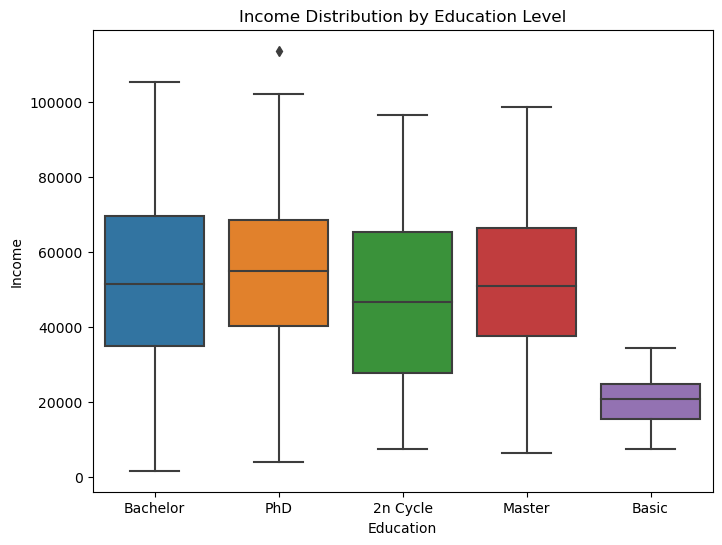

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.show()

The above boxplot indicates that individuals with a basic education earn the least, followed by those with 2nd Cycle education. Bachelor's degree holders come next, followed by those with a Master's degree, and finally, those with a PhD have the highest income. Thus, we will use this order.

#### 2. Encoding
    - One-hot encoding for 'Marital_Status' and 'Country' columns 
    - Ordinal encoding for 'Education' column

In [17]:

# Apply the one-hot encoding
df = pd.get_dummies(df, columns=['Marital_Status'], prefix=['Marital'])
df = pd.get_dummies(df, columns=['Country'], prefix=['Country'])

# Define the ordinal mapping
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Bachelor': 3,
    'Master': 4,
    'PhD': 5
}
    
# Apply the mapping to the dataframe
df['Education'] = df['Education'].map(education_mapping)

### Add three new columns: 'Age', 'Total_Spending', 'No_Children'

In [18]:
current_year = datetime.now().year

df['Age'] = current_year - df['Year_Birth']
df['Total_Spending'] = df.iloc[:,8:14].sum(axis=1)
df['No_Children'] = df['Kidhome'] + df['Teenhome']

## Step 3: EDA

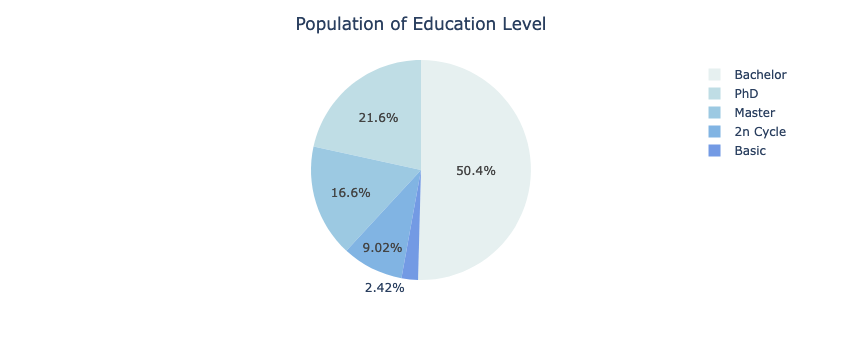

In [19]:
# get two list one for the education level and the second count of education
values_ed = ['Bachelor','PhD','Master','2n Cycle','Basic']
counts_ed = df['Education'].value_counts().tolist()
 # start visulize the precentage bsed on education level usinf pie chart

fig = px.pie(values=counts_ed, names=values_ed,color_discrete_sequence=px.colors.sequential.dense )

# add chart title and location
fig.update_layout(title_text='Population of Education Level', title_x=0.5)

fig.show()


This graph presents an overview of the distribution of education levels within the population, highlighting the proportion of individuals with different levels of educational attainment. 

Graph Description: The graph illustrates the percentage of individuals across different education levels in the population. It includes several categories representing various educational milestones, such as Basic,2n Cycle, Bachelor, Master and PhD. The largest segment of the population is (Bachelor) representing approximately 50% of the population, the next notable group comprises individuals who have completed (PhD), representing around 21% of the population.

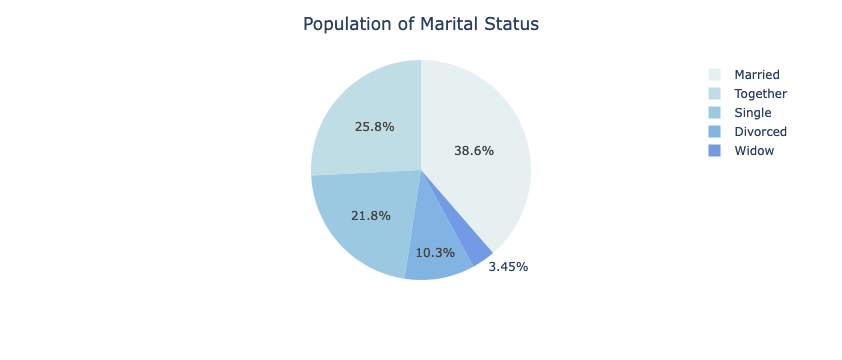

In [20]:
#Marital Status

Marital = ['Divorced' ,'Married','Single','Together',"Widow"]

amounts = [
    df['Marital_Divorced'].sum(),
    df['Marital_Married'].sum(),
    df['Marital_Single'].sum(),
    df['Marital_Together'].sum(),
    df['Marital_Widow'].sum(),
]
fig = px.pie(values=amounts, names=Marital,color_discrete_sequence=px.colors.sequential.dense )

fig.update_layout(title_text='Population of Marital Status', title_x=0.5)

fig.show()

The pie chart presents the percentages of individuals in various marital status categories. It includes several segments representing different marital statuses, such as Divorced,Married, Single, Together, and Widow. The pie chart offers a visual representation of the marital status distribution within the population, we realises that the largest segment of the pie chart is (Married) category  by ~38% , and the  second is (Togerher) category represented by ~25% of the population.

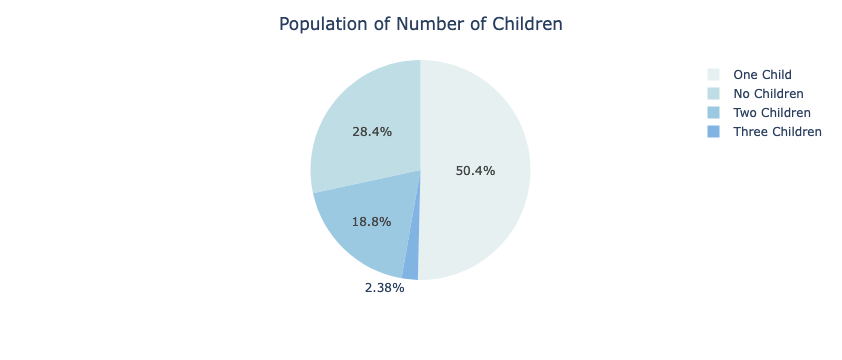

In [21]:
# No_Children
No_Children_counts = ["One Child ","No Children","Two Children","Three Children"]
total_Children_counts = df['No_Children'].value_counts().tolist()
fig = px.pie(values=total_Children_counts, names=No_Children_counts,color_discrete_sequence=px.colors.sequential.dense )

fig.update_layout(title_text='Population of Number of Children', title_x=0.5)

fig.show()

The pie chart represents the number of children individuals have, specifically focusing on four categories:
 those with one child, those with two children, those with three children and those with no children.
The size of each sector corresponds to the proportion or percentage of individuals falling into that category.  
The data obtained from the pie chart is as follows: -
* 50% of people have one child.
* 28% of people don't have children.
* 18% of people have two children.
*  2% of people have three children.
In conclusion we can say that people who has only one childe are the majority.

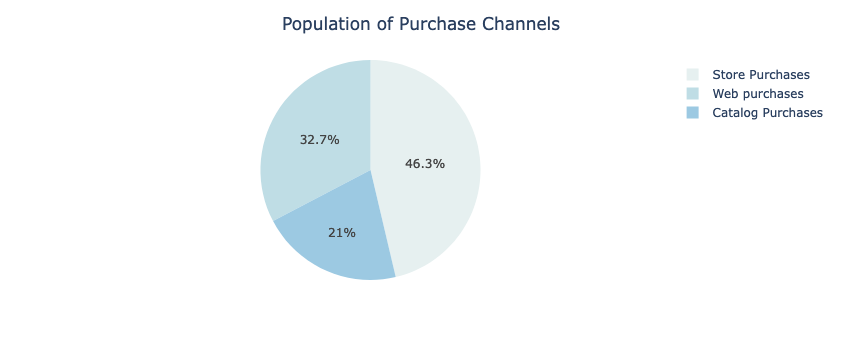

In [22]:
# Purchase channels

purchases = ['Web purchases' , 'Catalog Purchases','Store Purchases']

amounts = [
    df['NumWebPurchases'].sum(),
    df['NumCatalogPurchases'].sum(),
    df['NumStorePurchases'].sum()
]
fig = px.pie(values=amounts, names=purchases,color_discrete_sequence=px.colors.sequential.dense )

fig.update_layout(title_text='Population of Purchase Channels', title_x=0.5)

fig.show()

It is clear that people prefer to buy in store with proportion of 46.3%.

The second preferred channel of purchase is web channel with proportion of purchases 31.7%.

The least preferred channel is catalog with proportion of purchases 21%.

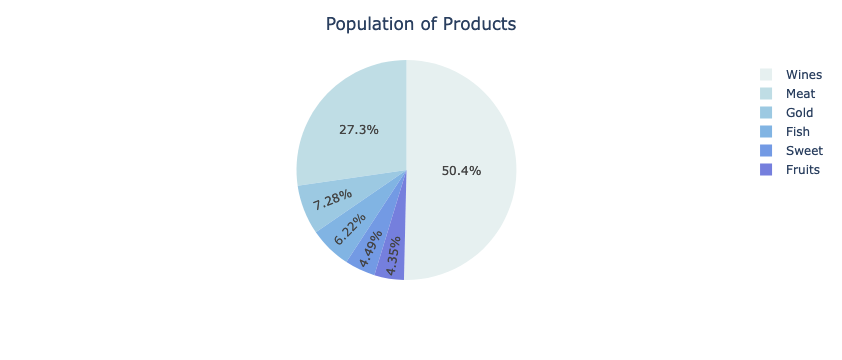

In [23]:
#Amount/Product

products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

amounts = [
    df['MntWines'].sum(),
    df['MntFruits'].sum(),
    df['MntMeatProducts'].sum(),
    df['MntFishProducts'].sum(),
    df['MntSweetProducts'].sum(),
    df['MntGoldProds'].sum()
]
fig = px.pie(values=amounts, names=products,color_discrete_sequence=px.colors.sequential.dense )

fig.update_layout(title_text='Population of Products', title_x=0.5)

fig.show()

This pie chart explains that wines are the most popular among these six products with proportion more than the half of this chart. The second popular product is meat which take  more than a quarter of this pie chart proportion.Gold and fish take the third and fourth places in terms of popularity. Finally, sweet and fruits have the least popularity among them all.

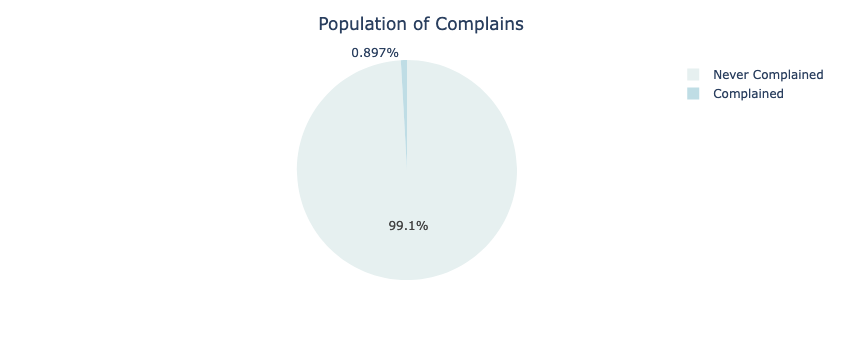

In [24]:
# Complains
complaine_count = ["Never Complained","Complained"]
complain_counts = df['Complain'].value_counts().tolist()

fig = px.pie(values=complain_counts, names=complaine_count,color_discrete_sequence=px.colors.sequential.dense )
fig.update_layout(title_text='Population of Complains', title_x=0.5)

fig.show()

This pie chart indicates that the proportion of people who complained is less than 1%.

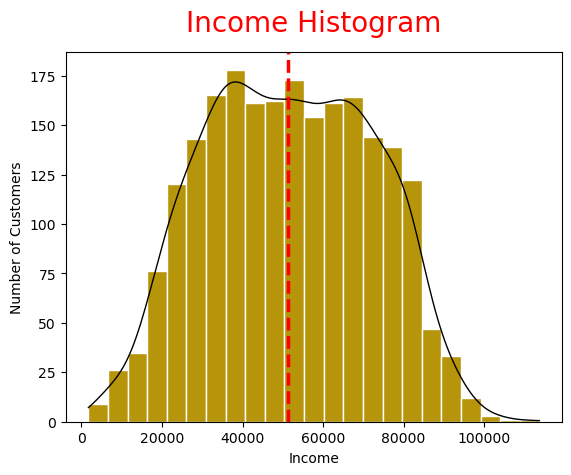

In [25]:
Income_median = np.median(df['Income'])
# Passing the attributes and setting into seaborn histogram
ax = sns.histplot(data=df['Income'], bins="auto", stat='count', alpha= 1, kde=True,
                  edgecolor='white', linewidth=1,color='#B7950B', 
                  line_kws=dict(linewidth=1))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit line color of the curve
plt.axvline(Income_median, color="red", ls='--', lw=2.5)

# Median line, Titel and x,y access setting
ax.set_title('Income Histogram',fontsize = 20, pad=15, color = "red")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

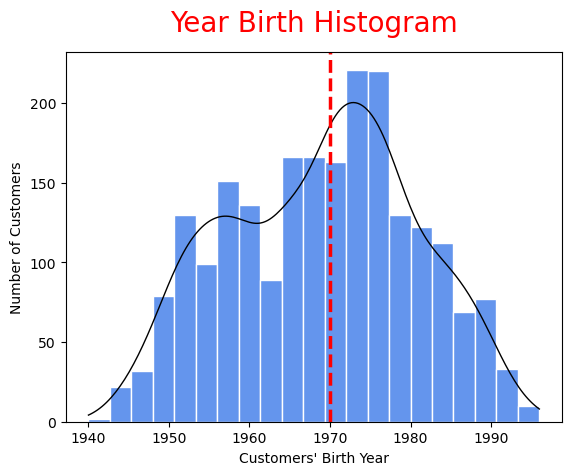

In [26]:
# Get the Year_Birth of customers
Year_Birth_median = np.median(df['Year_Birth'])

# Passing the attributes and setting into seaborn histogram
ax = sns.histplot(data=df['Year_Birth'], bins="auto", stat='count', alpha= 1, kde=True,
                  edgecolor='white', linewidth=1,color='#6495ED', 
                  line_kws=dict(linewidth=1))

# Edit line color of the curve
ax.get_lines()[0].set_color('black') 

# Median line, Titel and x,y access setting
plt.axvline(Year_Birth_median, color="red", ls='--', lw=2.5)
ax.set_title('Year Birth Histogram',fontsize = 20, pad=15, color = "red")
plt.xlabel("Customers' Birth Year")
plt.ylabel("Number of Customers")
plt.show()

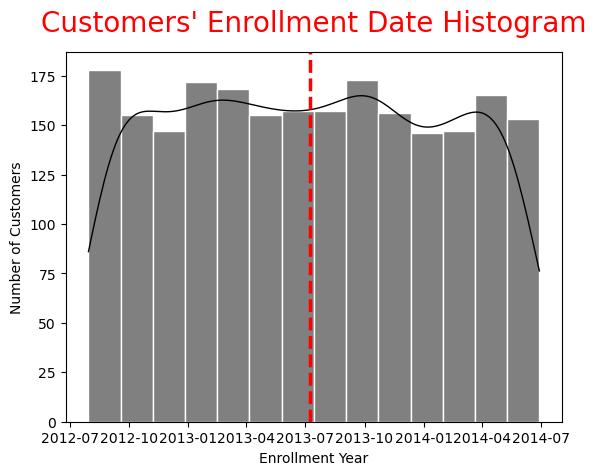

In [27]:
# Get the enrollment date  median of customers with the company 
Dt_Customer_median = df['Dt_Customer'].median()

# Passing the attributes and setting into seaborn histogram 
ax = sns.histplot(data=df['Dt_Customer'], bins="auto", stat='count', 
                  alpha= 1, kde=True,edgecolor='white', linewidth=1,color='#808080', 
                  line_kws=dict( linewidth=1))

# Edit line color of the curve
ax.get_lines()[0].set_color('black') 

# ax.legend(frameon=False)

# Median line, Titel and x,y access setting
plt.axvline(Dt_Customer_median, color="red", ls='--', lw=2.5)
#plt.text(175, 1000, '2010 Earthquake') 
ax.set_title("Customers' Enrollment Date Histogram",fontsize = 20, pad=15, color = "red")
plt.xlabel("Enrollment Year")
plt.ylabel("Number of Customers")
plt.show()

### Multivariate (All/several variables together)

This heatmap illustrates the relationship between the DataFrame's various columns. Deep blue indicates a strong positive correlation, whereas dark red represents a strong negative correlation. Fainter shades of these colors represent weaker correlations.

<AxesSubplot:>

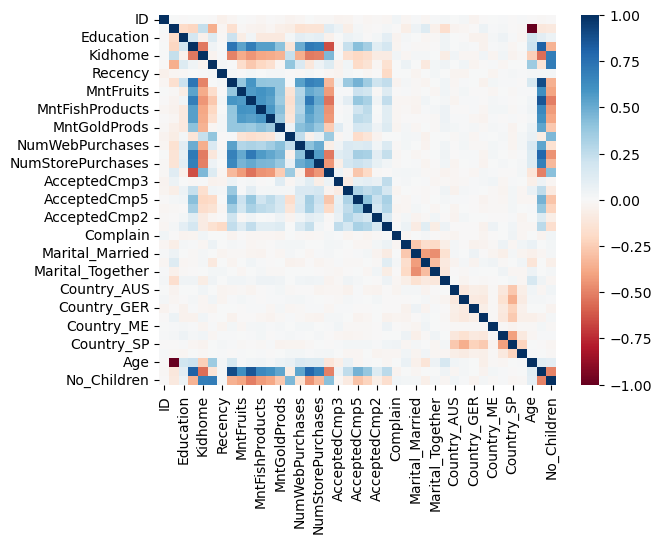

In [28]:
corr = df.corr()
import matplotlib.colors as mcolors

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False

# Create a heatmap 
sns.heatmap(corr, cmap='RdBu', mask=mask,cbar=True)

## Step 4: Hypothesis Testing

 #### Older people are not as tech-savvy and probably prefer shopping in-store.
   - Sample: Older people (age >50).
   - H0: Older people don’t have a preference regarding shopping.
   - H1: Older people prefer shopping in store.
   - Test Type: T-test.

T-Test =  2.92655956821561e-78
Reject the null hypothesis, older people prefer shopping in store.

Z-Test =  3.552985095870339e-49
Reject the null hypothesis, older people prefer shopping in store.


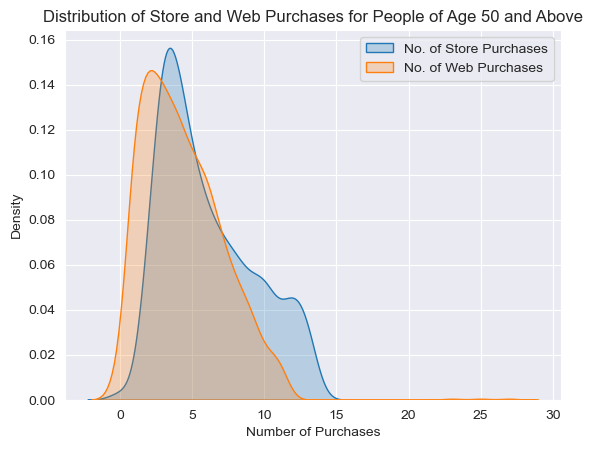

In [29]:
sns.set_style('darkgrid')

a = df[df['Age']>=50]['NumStorePurchases']
b = df[df['Age']>=50]['NumWebPurchases']

sns.kdeplot(a,shade = True, label = 'No. of Store Purchases')
sns.kdeplot(b,shade = True, label = 'No. of Web Purchases')

# Add title and axis labels
plt.title('Distribution of Store and Web Purchases for People of Age 50 and Above')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

# Apply stats.ttest_rel because we have two different purchase channels of the same group of customers
t_stat,p_value = stats.ttest_rel(a,b)

# Apply z_test
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, older people prefer shopping in store.")
else:
    print("Fail to reject the null hypothesis, older people don’t have a preference regarding shopping.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, older people prefer shopping in store.")
else:
    print("Fail to reject the null hypothesis, older people don’t have a preference regarding shopping.")


#### Customers with kids probably have less time to visit a store and would prefer to shop online.
   - Sample: People with kids (parents) .
   - H0: Parents don’t have a preference regarding shopping.
   - H1: Parents prefer online shopping.
   - Test Type: T-test.

T-Test =  2.8732134615931844e-92
Reject the null hypothesis, parents prefer online shopping.

Z-Test =  3.610542592028488e-125
Reject the null hypothesis, parents prefer online shopping.


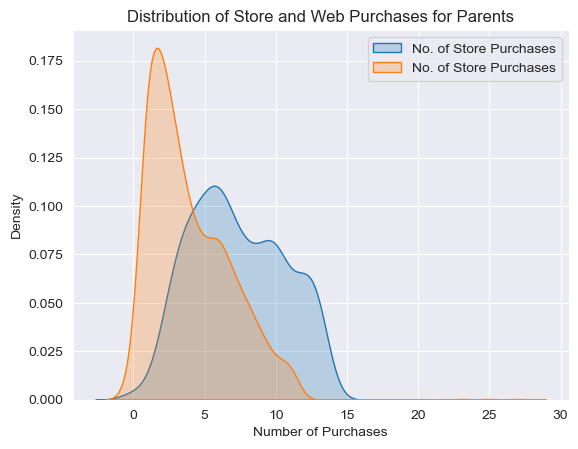

In [30]:
sns.set_style('darkgrid')

a = df[df['No_Children']==0]['NumStorePurchases']
b = df[df['No_Children']>0]['NumWebPurchases']

sns.kdeplot(a,shade = True, label = 'No. of Store Purchases')
sns.kdeplot(b,shade = True, label = 'No. of Store Purchases')

# Add title and axis labels
plt.title('Distribution of Store and Web Purchases for Parents')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

# Apply stats.ttest_ind because we have two different groups of customers
t_stat,p_value = stats.ttest_ind(a,b,equal_var=False)

# Apply z_test
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, parents prefer online shopping.")
else:
    print("Fail to reject the null hypothesis, parents don’t have a preference regarding shopping.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, parents prefer online shopping.")
else:
    print("Fail to reject the null hypothesis, parents don’t have a preference regarding shopping.")


#### Other distribution channels may cannibalize sales at the store.
   - Sample: Entire dataset.
   - H0: Web and catalog sales don’t impact sales at the store.
   - H1: Web and catalog sales impact sales at the store.
   - Test Type: ANOVA.

T-Test =  4.1798505644061294e-32
Reject the null hypothesis, web and catalog sales impact sales at the store.

Z-Test =  1.813385096567064e-14
Reject the null hypothesis, web and catalog sales impact sales at the store.


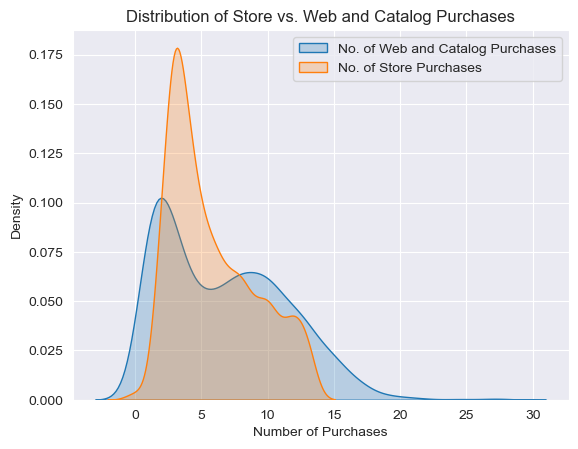

In [31]:
# Method1: Z-test or T-test

sns.set_style('darkgrid')

# Combine the two columns to have one variable vs one variable test
a = df['NumWebPurchases']+ df['NumCatalogPurchases'] 
b = df['NumStorePurchases']

sns.kdeplot(a,shade = True, label = 'No. of Web and Catalog Purchases')
sns.kdeplot(b,shade = True, label = 'No. of Store Purchases')

# Add title and axis labels
plt.title('Distribution of Store vs. Web and Catalog Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

# Apply stats.ttest_rel because we have two different purchase channels of the same group of customers
t_stat,p_value = stats.ttest_rel(a,b)

# Apply Z-test
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, web and catalog sales impact sales at the store.")
else:
    print("Fail to reject the null hypothesis, web and catalog sales don’t impact sales at the store.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, web and catalog sales impact sales at the store.")
else:
    print("Fail to reject the null hypothesis, web and catalog sales don’t impact sales at the store.")

F-Statistic: 649.017612035794
P-value: 2.55859661340458e-258
Reject the null hypothesis, web and catalog sales impact sales at the store.


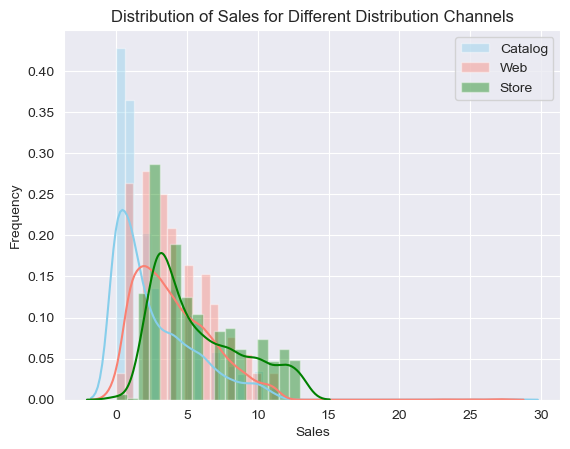

In [32]:
sales_catalog = df['NumCatalogPurchases']
sales_web = df['NumWebPurchases']
sales_store = df['NumStorePurchases']


fvalue, pvalue = stats.f_oneway(sales_catalog, sales_web, sales_store)

print("F-Statistic:", fvalue)
print("P-value:", pvalue)

if pvalue < 0.05:
    print("Reject the null hypothesis, web and catalog sales impact sales at the store.")
else:
    print("Fail to reject the null hypothesis, web and catalog sales don’t impact sales at the store.")

#plt.figure(figsize=(8, 6))
sns.distplot(sales_catalog, kde=True, color='skyblue', label='Catalog')
sns.distplot(sales_web, kde=True, color='salmon', label='Web')
sns.distplot(sales_store, kde=True, color='green', label='Store')
plt.legend()
plt.title('Distribution of Sales for Different Distribution Channels')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show();

#### Does the US fare significantly better than the rest of the world in terms of total purchases?
   - Sample: Entire dataset.
   - H0: Number of US purchases = number of non-US purchases. 
   - H1: Number of US purchases is higher than number of non-US purchases.
   - Test Type: T-test.

T-Test =  0.2137515171967937
Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.

Z-Test =  0.22307804540871568
Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.


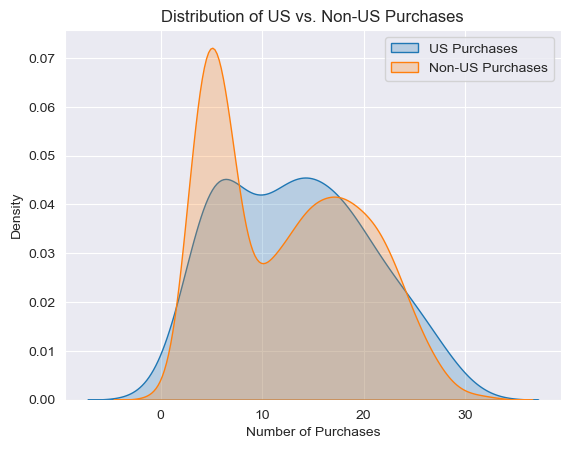

In [33]:
sns.set_style('darkgrid')

a= df[df['Country_US']==1]
b= df[df['Country_US']!=1]

a = a['NumWebPurchases']+a['NumStorePurchases']+a['NumCatalogPurchases']
b = b['NumWebPurchases']+b['NumStorePurchases']+b['NumCatalogPurchases']

sns.kdeplot(a,shade = True, label = 'US Purchases')
sns.kdeplot(b,shade = True, label = 'Non-US Purchases')

# Add title and axis labels
plt.title('Distribution of US vs. Non-US Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Density')
plt.legend()

# Apply stats.ttest_ind because we have two different groups of customers
t_stat,p_value = stats.ttest_ind(a,b,equal_var=False)

# Apply Z-test
z_test = ztest(a,b,value = 0)

print('T-Test = ', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis, number of US purchases is higher than number of non-US purchases.")
else:
    print("Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.")

    
print('\nZ-Test = ', z_test[1])
if z_test[1] < 0.05:
    print("Reject the null hypothesis, number of US purchases is higher than number of non-US purchases.")
else:
    print("Fail to reject the null hypothesis, number of US purchases = number of non-US purchases.")


## Step 5: Analysis

#### 1. Which products are performing the best, and which are performing the least in terms of revenue?

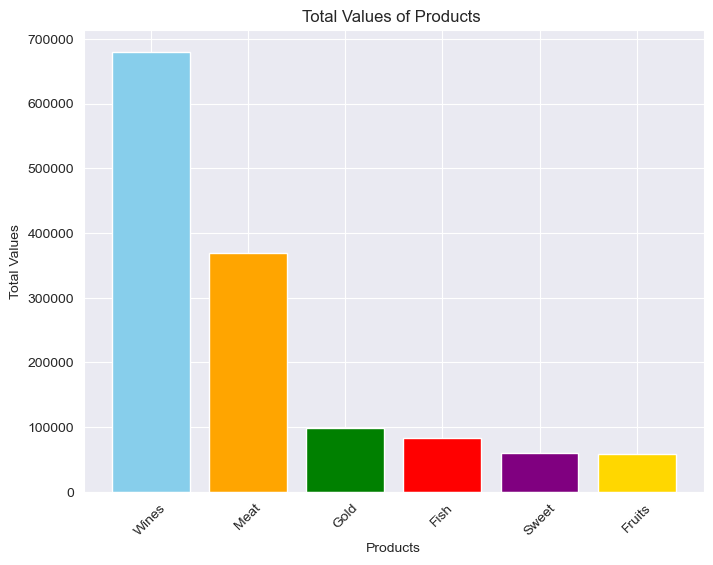

In [34]:
products = ['Wines','Fruits','Meat','Fish','Sweet','Gold']

product_values = [(product, df[col].sum()) for product, col in zip(products, df.columns[8:14])]

sorted_product_values = sorted(product_values, key=lambda x: x[1], reverse=True)

sorted_products, sorted_values = zip(*sorted_product_values)


plt.figure(figsize=(8, 6))
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'gold']
plt.bar(sorted_products, sorted_values, color=colors)
plt.xlabel('Products')
plt.ylabel('Total Values')
plt.title('Total Values of Products ')
plt.xticks(rotation=45)
plt.show()

Descibe results/plots...

#### 2. Is there any pattern between the age of customers and the last campaign acceptance rate?

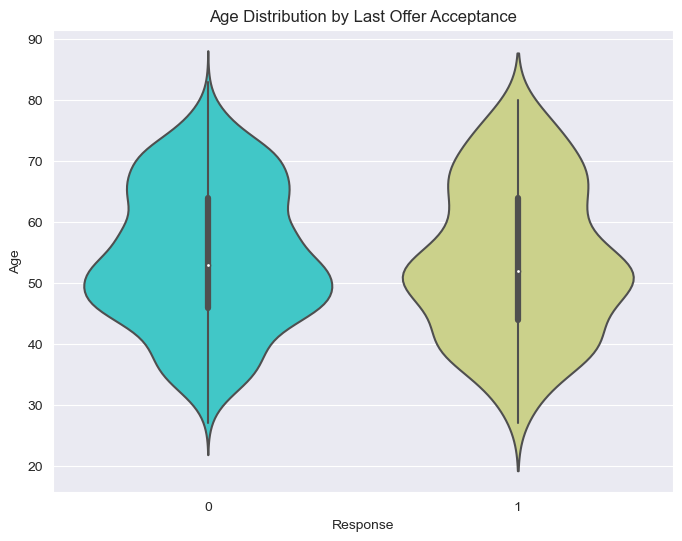

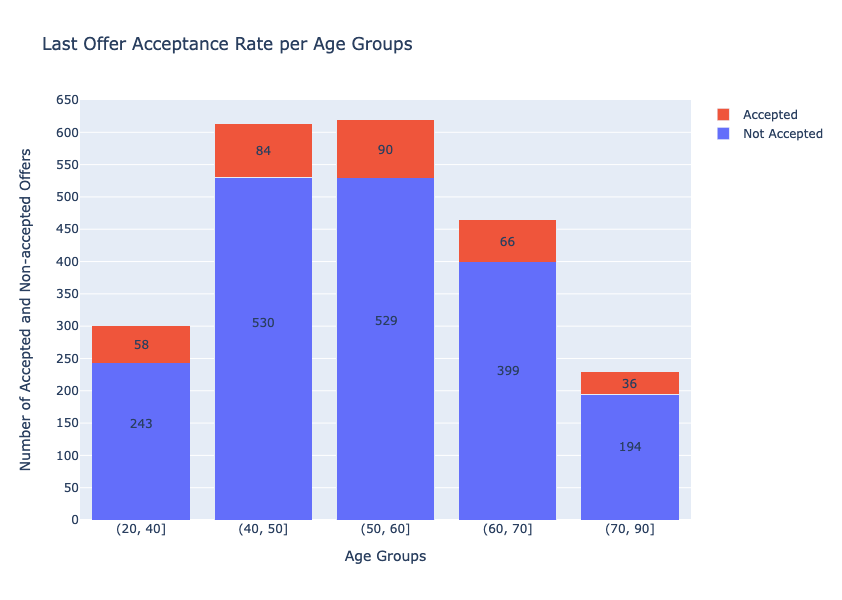

In [35]:
# Plot violin figure to show last offer acceptance per customers' age 
plt.figure(figsize=(8, 6))
sns.violinplot(x='Response', y='Age', data=df, palette='rainbow')
plt.title('Age Distribution by Last Offer Acceptance')
plt.show()

# Binning ages. We combine ages (20,40) in one group because we have only 15 people under 30, and ages (70,90) in one bin because only ~2 customers are older than 80.
#plt.figure(figsize=(8, 6))
bins = [20, 40, 50, 60, 70, 90]
df['age_bin'] = pd.cut(df['Age'], bins=bins)
df['age_bin'] = df['age_bin'].astype(str)


# Create a crosstab for stacking
ct = pd.crosstab(df['age_bin'], df['Response'])

# Stacked Bar Plot using Plotly
fig = go.Figure(data=[
    go.Bar(name='Not Accepted', x=ct.index.astype(str), y=ct[0]),
    go.Bar(name='Accepted', x=ct.index.astype(str), y=ct[1])
])




# Add titles and y-axis tick values
fig.update_layout(
    barmode='stack',
    title = 'Last Offer Acceptance Rate per Age Groups',
    xaxis_title="Age Groups",
    yaxis_title="Number of Accepted and Non-accepted Offers",
    yaxis=dict(
        tickvals=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
        range=[0, 650]
    ),
        width=800,  # Width in pixels
    height=600  # Height in pixels
)

# Add annotations to stacked bars
for i, age_bin in enumerate(ct.index):
    fig.add_annotation(
        x=age_bin,
        y=ct.loc[age_bin].sum() / 2,
        text=str(ct.loc[age_bin, 0]),
        showarrow=False
    )
    fig.add_annotation(
        x=age_bin,
        y=ct.loc[age_bin, 0] + (ct.loc[age_bin, 1] / 2),
        text=str(ct.loc[age_bin, 1]),
        showarrow=False
    )

fig.show()


To find a pattern between customer age and the acceptance rate of the last campaign, we analyzed the data using both violin and stacked bar plots. The violin plot showed the density of customers who accepted the last offer versus those who didn't accept the offer, per age group. There were fewer customers who accepted the offer than those who didn't. The violin plot also showed that there were no customers older than 90.

To check the acceptance rate per age group, we binned customers based on their age into bins of size 10, except for the [20,30] and [80,90] bins, which we combined with the neighboring bins because we only had 15 and 2 customers in those bins, respectively.

The majority of people who accepted the last offer were in the 50-60 age range, with 90 customers. This was followed by customers in the 40-50 age range. The least number of offer acceptances were from customers in the 70-90 age range.


If we look at percentages instead of abstract numbers, we notice that customers between 20 and 40 had the highest acceptance rate, at 19%. Customers in the 70-90 age group had the second-highest acceptance rate, at 15.7%. Customers in the 40-50 age group had the lowest acceptance rate, at 13.7%.


Age Group -- Acceptance Rate

(20-40]    --    0.192

(40-50]    --    0.137

(50-60]    --    0.145

(60-70]    --    0.142

(70-90]    --    0.157

#### 3. Which Country has the greatest number of customers who accepted the last campaign?

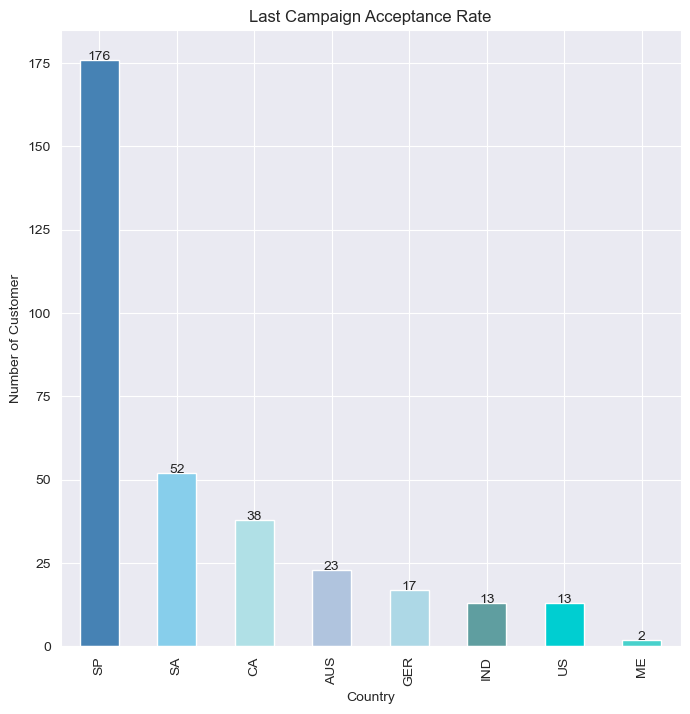

In [36]:
inde = response_rate.index
values = response_rate.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize= 10 )
addlabels(inde, values)
response_rate.plot(kind='bar', figsize=(8,8),color=['#4682B4','#87CEEB','#B0E0E6','#B0C4DE','#ADD8E6','#5F9EA0','#00CED1','#48D1CC'] )
plt.title("Last Campaign Acceptance Rate")
plt.xlabel("Country")
plt.ylabel("Number of Customer")
plt.show()


The bar chart highlights the acceptance of last campaign across eight countries. Spain (SP) leads with 176 customers, showcasing its market strength. South Africa (SA) follows, while the Middle East (ME) shows minimal interest with only two responses. The dominance of Spain indicates potential business opportunities there, but it's essential to consider factors like population and market trends. Overall, Spain emerges as the top market among the presented countries.

#### 4. Do you see any pattern in the no. of children at home and total spend?

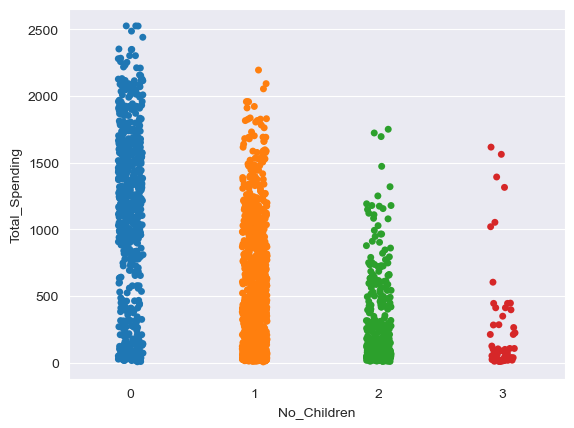

In [37]:
sns.stripplot(df["No_Children"], df["Total_Spending"]);

The above graph shows the relation between the number of children and total spending. we notice The fewer the children, the higher the exchange rate.

#### 5. Education background of the customers who complained in the last 2 years.

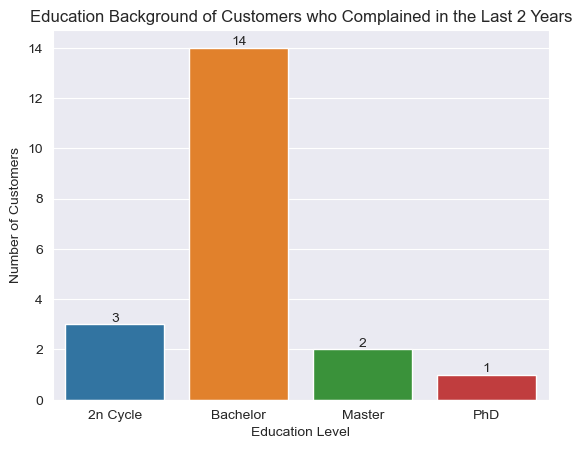

In [38]:

complained_customers = df[df['Complain'] == 1]
education_counts = complained_customers['Education'].value_counts().sort_index()

sns.countplot(x='Education', data=complained_customers )

plt.title("Education Background of Customers who Complained in the Last 2 Years")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")

for i, count in enumerate(education_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
new_labels = ['2n Cycle', 'Bachelor', 'Master', 'PhD']
plt.gca().set_xticklabels(new_labels)

plt.show()

The total number of customers is 2229,and from the chart we can see that the total number of complaints is 20, indicating a low number of complaints.

Based on the bar chart, we can conclude that the highest number of complaints in the last 2 years comes from customers with a Bachelor's degree, with 14 complaints out of 1124. They are followed by those with a 2n cycle degree, with 3 complaints out of 201. Next are customers with a Master's degree, with 2 complaints out of 369. Finally, out of 481 customers with a PhD degree there is only 1 complaint.